In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wave
from playsound import playsound

In [2]:
#FUNCTIONS

#DTFT FUNCTION - accepts omega, signal and array where the signal is defined
def DTFT(w,sig,n):
    z = np.zeros(len(w),dtype=complex)
    for m in range(len(w)):                    #for all the omegas in given range
        dtft = 0
        for i in range (len(sig)):             #for all the points of signal
            dtft = dtft + (sig[i]*(np.cos(w[m]*n[i])-(np.sin(w[m]*n[i]))*1j))      #analysis equation
        z[m] = dtft
    return z                                   #returns an array which contains dtft of a specific W as element

#Function to plot magnitude,phase and group delay plots of a function
def plot_spectrums(y,w,a):
    mag = []
    phase = []
    grd = []
    
    if(a==1):                                   #To plot all the three plots (magnitude,phase and group delay)
        for i in range(len(w)):              #Calculating magnitude and phase
            mag.append(abs(y[i]))
            phase.append(np.angle(y[i]))
    
        for i in range(len(w)-1):            #Calculating group delay
            ele = -(phase[i+1]-phase[i-1])/(2*(w[i+1]-w[i]))
            grd.append(ele)
        grd.append(ele)
        plt.subplot(3,1,1)
        plt.title("Magnitude spectrum")
        plt.xlabel("ω")
        plt.ylabel("magnitude")
        plt.plot(w,mag)
        plt.show()
        plt.subplot(3,1,2)
        plt.title("Phase spectrum")
        plt.xlabel("ω")
        plt.ylabel("phase(radians)")
        plt.plot(w,phase)
        plt.show()
        plt.subplot(3,1,3)
        plt.title("Group Delay")
        plt.xlabel("ω")
        plt.ylabel("group delay")
        plt.plot(w,grd)
        plt.ylim(0,3)
        plt.show()
    else:                                      #To plot only two plots(magnitude and phase)
        for i in range(len(w)):              #Calculating magnitude and phase
            mag.append(abs(y[i]))
            phase.append(np.round(np.angle(y[i])))
    
        for i in range(len(w)-1):            #Calculating group delay
            ele = -(phase[i+1]-phase[i-1])/(2*(w[i+1]-w[i]))
            grd.append(ele)
        grd.append(ele)
        plt.subplot(2,1,1)
        plt.title("Magnitude spectrum")
        plt.xlabel("ω")
        plt.ylabel("magnitude")
        plt.plot(w,mag)
        plt.show()
        plt.subplot(2,1,2)
        plt.title("Phase spectrum")
        plt.xlabel("ω")
        plt.ylabel("phase(radians)")
        plt.plot(w,phase)
        plt.show()

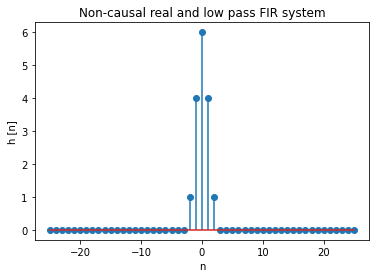

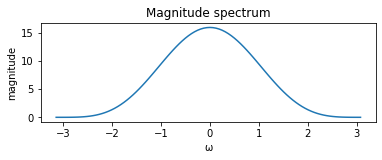

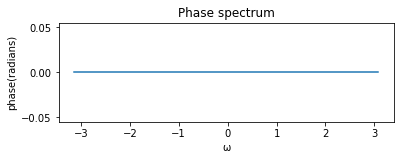

We can observe from the above plots that the filter is indeed low pass and has zero-phase response.
Every second order zero phase FIR filter has an impulse response of the form b1δ[n + 1] + b0δ[n] + b1δ[n − 1].
Extending the previous to every order 2N zero-phase real FIR filter b2δ[n + 2] + b1δ[n + 1] + b0δ[n] + b1δ[n − 1] + b2δ[n + 2]


In [3]:
#Q1

k = 25
l = np.linspace(-k,k,2*k+1)
h = np.zeros(2*k+1)
for i in range(2*k+1):
    if l[i] == -2:
        h[i] = 1
    elif l[i] == -1:
        h[i] = 4
    elif l[i] == 0:
        h[i] = 6
    elif l[i] == 1:
        h[i] = 4
    elif l[i] == 2:
        h[i] = 1
    else:
        h[i] = 0

N = 100                                                #Number of values of w
w = np.linspace(-1*np.pi,1*np.pi,N,endpoint = False)   #omega in the range -π ≤ ω < π

plt.title("Non-causal real and low pass FIR system")
plt.xlabel("n")
plt.ylabel("h [n]")
plt.stem(l,h)
plt.show()
plot_spectrums(DTFT(w,h,l),w,0)
print("We can observe from the above plots that the filter is indeed low pass and has zero-phase response.") 
print("Every second order zero phase FIR filter has an impulse response of the form b1δ[n + 1] + b0δ[n] + b1δ[n − 1].")
print("Extending the previous to every order 2N zero-phase real FIR filter b2δ[n + 2] + b1δ[n + 1] + b0δ[n] + b1δ[n − 1] + b2δ[n + 2]")


In [4]:
#Q2(a)

#Type 1 system
h1 = np.array([5,4,1,4,5])
n = np.linspace(0,len(h1)-1,len(h1))

#Obtaining Type 3 system
def Type_1to3(h1):
    h3 = np.ones(len(h1))
    for i in range(len(h1)):
        if i == (len(h1)-1)/2 :
            h3[i] = 0
        elif i<(len(h1)-1)/2:
            h3[i] = h1[i]
        else:
            h3[i] = (-1)*h1[i]
    return h3

h3 = Type_1to3(h1)
 

print("Type 1 system : ", h1)
print("Type 3 system : ", h3)


Type 1 system :  [5 4 1 4 5]
Type 3 system :  [ 5.  4.  0. -4. -5.]


In [5]:
#Q2(b)

#Type 2 system
h2 = np.array([-1,-2,4,4,-2,-1])
t = np.linspace(0,len(h2)-1,len(h2))

#Obtaining Type 4 system
def Type_2to4(h2):
    h4 = np.ones(len(h2))
    for i in range(len(h2)):
        h4[i] = ((-1)**i)*h2[i]
    return h4
 
h4 = Type_2to4(h2)
print("Type 2 system : ", h2)
print("Type 4 system : ", h4)


Type 2 system :  [-1 -2  4  4 -2 -1]
Type 4 system :  [-1.  2.  4. -4. -2.  1.]


TYPE 1 SYSTEM


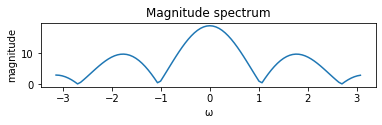

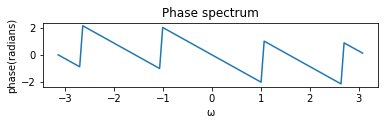

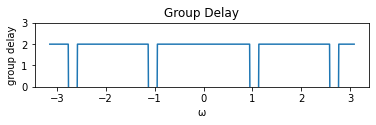

TYPE 3 SYSTEM


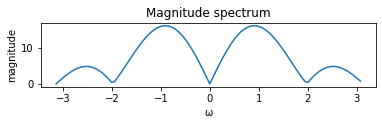

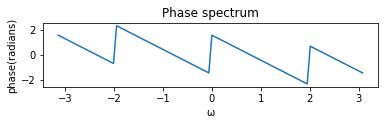

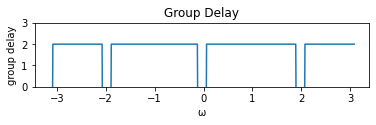

TYPE 2 SYSTEM


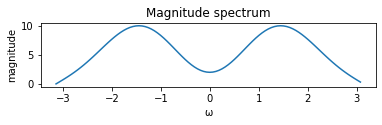

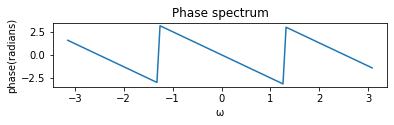

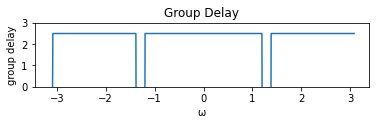

TYPE 4 SYSTEM


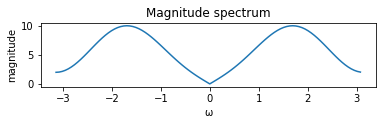

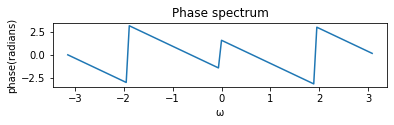

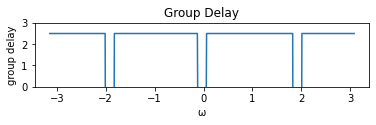

2c Observation

Type 1 and type 3 have same group delay
Similarly type 2 and type4 have same group delay

2d Observation :

We can observe from the above plots that the type I system is a low pass filter and type III system is a high pass filter

Whereas type IV system has a shift of pi units with respect to type II system


In [6]:
#Q2(c)

N = 100                                                #Number of values of w
w = np.linspace(-1*np.pi,1*np.pi,N,endpoint = False)   #omega in the range -π ≤ ω < π

print("TYPE 1 SYSTEM")
plot_spectrums(DTFT(w,h1,n),w,1)
print("TYPE 3 SYSTEM")
plot_spectrums(DTFT(w,h3,n),w,1)
print("TYPE 2 SYSTEM")
plot_spectrums(DTFT(w,h2,t),w,1)
print("TYPE 4 SYSTEM")
plot_spectrums(DTFT(w,h4,t),w,1)

print("2c Observation\n")
print("Type 1 and type 3 have same group delay")
print("Similarly type 2 and type4 have same group delay\n")
print("2d Observation :\n")
print("We can observe from the above plots that the type I system is a low pass filter and type III system is a high pass filter\n")
print("Whereas type IV system has a shift of pi units with respect to type II system")